Files already downloaded and verified
Files already downloaded and verified
Epoch 1/15, Train Loss: 0.6227, Train Acc: 78.25%, Val Loss: 0.4311, Val Acc: 85.15%
Epoch 2/15, Train Loss: 0.4054, Train Acc: 85.91%, Val Loss: 0.3876, Val Acc: 86.36%
Epoch 3/15, Train Loss: 0.3442, Train Acc: 87.99%, Val Loss: 0.3223, Val Acc: 88.92%
Epoch 4/15, Train Loss: 0.2965, Train Acc: 89.66%, Val Loss: 0.3141, Val Acc: 88.80%
Epoch 5/15, Train Loss: 0.2650, Train Acc: 90.75%, Val Loss: 0.3020, Val Acc: 89.81%
Epoch 6/15, Train Loss: 0.2409, Train Acc: 91.59%, Val Loss: 0.2909, Val Acc: 89.97%
Epoch 7/15, Train Loss: 0.2216, Train Acc: 92.30%, Val Loss: 0.3105, Val Acc: 89.74%
Epoch 8/15, Train Loss: 0.2009, Train Acc: 92.91%, Val Loss: 0.3056, Val Acc: 89.62%
Epoch 9/15, Train Loss: 0.1906, Train Acc: 93.32%, Val Loss: 0.2784, Val Acc: 90.50%
Epoch 10/15, Train Loss: 0.1704, Train Acc: 93.98%, Val Loss: 0.2652, Val Acc: 90.98%
Epoch 11/15, Train Loss: 0.1590, Train Acc: 94.35%, Val Loss: 0.2449, Val

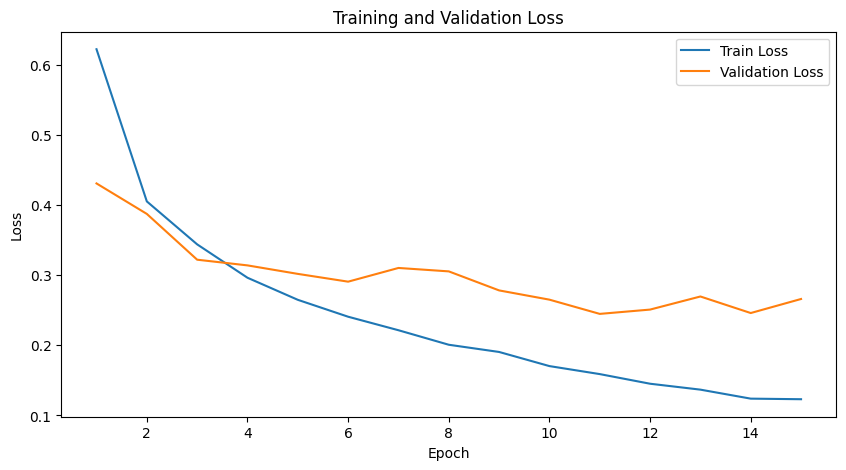

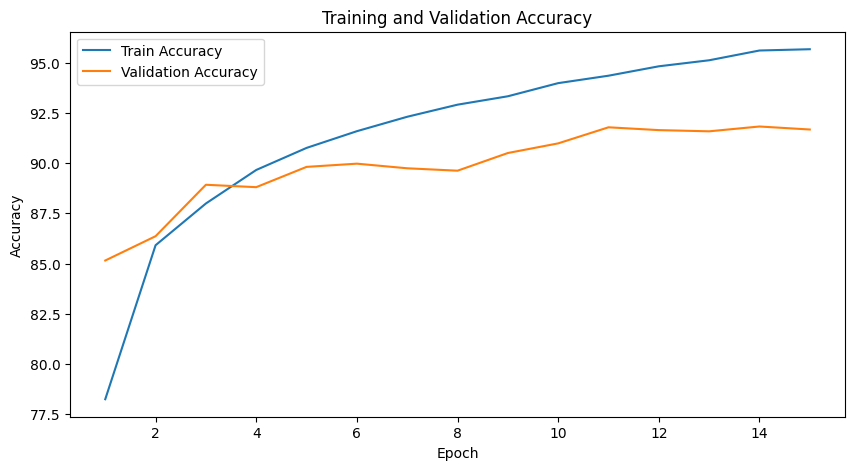

In [5]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data preprocessing and augmentation with resizing to 224x224
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 for AlexNet
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define AlexNet model and modify the final layer for 10 classes
model = models.alexnet(pretrained=True)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 10)  # CIFAR-10 has 10 classes
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Lists to record loss and accuracy for each epoch
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training and validation loop
for epoch in range(15):  # Train for 15 epochs
    # Training phase
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100. * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = 100. * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{15}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

# Plot Training and Validation Loss
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

